In [1]:
#from pycaret.classification import *
# Load libraries
import numpy
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import time as time
import seaborn as sns
from matplotlib import pyplot
import pandas_profiling
from numpy import arange
from numpy import argmax
from pandas import set_option
set_option('display.max_rows', 500)
set_option('display.max_columns', 500)
set_option('display.width', 500)
#set_option('precision', 3)
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from boruta import BorutaPy
from pandas.plotting import scatter_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.preprocessing import binarize,PowerTransformer,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.calibration import CalibratedClassifierCV ,calibration_curve
from sklearn.metrics import confusion_matrix,classification_report
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from imblearn.combine import SMOTEENN
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.combine import SMOTETomek,SMOTEENN
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN,SMOTENC
from imblearn.under_sampling import ClusterCentroids,CondensedNearestNeighbour,EditedNearestNeighbours,NearMiss,RandomUnderSampler,TomekLinks
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.metrics import classification_report_imbalanced,geometric_mean_score,sensitivity_score,specificity_score
from imblearn.ensemble import BalancedBaggingClassifier,BalancedRandomForestClassifier,EasyEnsembleClassifier,RUSBoostClassifier
from collections import Counter
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,precision_score,recall_score
from sklearn.metrics import precision_recall_curve,auc
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.metrics import SCORERS
from imblearn.over_sampling import SMOTE,RandomOverSampler
from collections import Counter
from scipy import stats
from scipy.stats import norm
from numpy import mean
from numpy import std
from scipy import stats
import numpy as np
from imblearn.metrics import sensitivity_score,specificity_score,geometric_mean_score
sns.set_style(style='dark')
%matplotlib inline
from sklearn.metrics import roc_auc_score,balanced_accuracy_score,average_precision_score
from pycaret.classification import load_model
import warnings
warnings.filterwarnings("ignore")




### About Dataset
# Credit Card Payment Default Prediction
Credit card is a flexible tool by which a customer can use a bank's money for a short period of time.

Predicting accurately which customers are most probable to default represents a significant business 
opportunity for all banks. Bank cards are the most common credit card type in Taiwan, which 
emphasizes the impact of risk prediction on both the consumers and banks.

This would inform the bank’s decisions on criteria to approve a credit card application and also decide 
upon what credit limit to provide.

This dataset contains information on default payments, demographic factors, credit data, history of 
payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Using the information given, predict the probability of a customer defaulting in the next month.

About Data Source:
Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.)


### [Attributes information:]()

LIMITBAL : Amount of given credit (NT dollars): It includes both the individual consumer credit and his/her family (supplementary) credit <br>
SEX : Gender (1=male, 2=female)<br>
EDUCATION : (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<br> 
MARRIAGE : Marital status (1=married, 2=single, 3=divorced) <r>
AGE : Age of the client <br>
PAY0 : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)<br>
PAY2 : Repayment status in August, 2005 (scale same as above)<br> 
PAY3 : Repayment status in July, 2005 (scale same as above)<br>
PAY4 : Repayment status in June, 2005 (scale same as above)<br> 
PAY5 : Repayment status in May, 2005 (scale same as above)<br>
PAY6 : Repayment status in April, 2005 (scale same as above)<br> 
BILLAMT1 : Amount of bill statement in September, 2005 (NT dollar)<br>
BILLAMT2 : Amount of bill statement in August, 2005 (NT dollar)<br> 
BILLAMT3 : Amount of bill statement in July, 2005 (NT dollar)<br>
BILLAMT4 : Amount of bill statement in June, 2005 (NT dollar) <br>
BILLAMT5 : Amount of bill statement in May, 2005 (NT dollar)<br>
BILLAMT6 : Amount of bill statement in April, 2005 (NT dollar)<br> 
PAYAMT1 : Amount of previous payment in September, 2005 (NT dollar)<br>
PAYAMT2 : Amount of previous payment in August, 2005 (NT dollar) <br>
PAYAMT3 : Amount of previous payment in July, 2005 (NT dollar)<br>
PAYAMT4 : Amount of previous payment in June, 2005 (NT dollar) <br>
PAYAMT5 : Amount of previous payment in May, 2005 (NT dollar)<br>
PAYAMT6 : Amount of previous payment in April, 2005 (NT dollar) defaultpaymentnextmonth <br>
Target Variable: <br>
Default : payment (1=yes, 0=no)<br><br>

In [2]:
df = pd.read_csv("default.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
#df.profile_report()

In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month'], dtype='object')

In [7]:
# summarize the number of unique values in each column
print(df.nunique())

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64


In [8]:
# locate rows of duplicate data
df.duplicated().any()

False

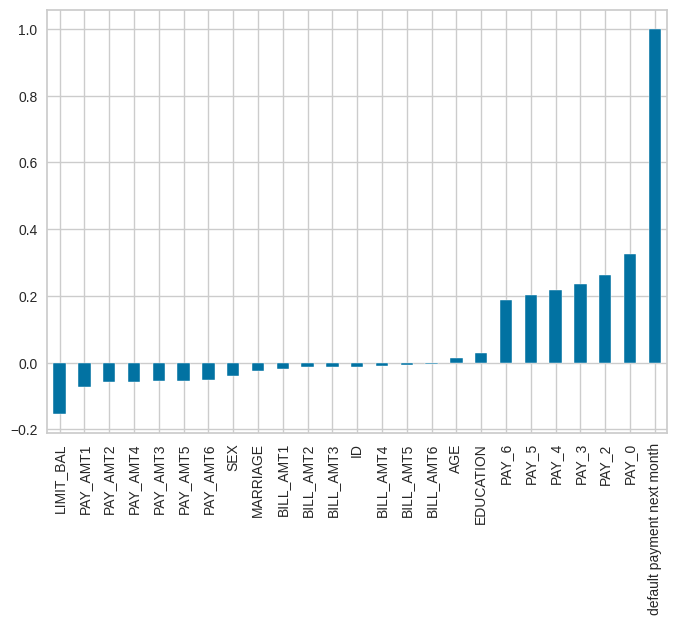

In [9]:
# plot correlation
df.corr()['default payment next month'].sort_values().plot(kind='bar')
plt.show()

In [10]:
df.shape

(30000, 25)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [12]:
df.drop(columns='ID',inplace = True)

Text(0.5, 1.0, 'Correlation Matrix(for dataset)')

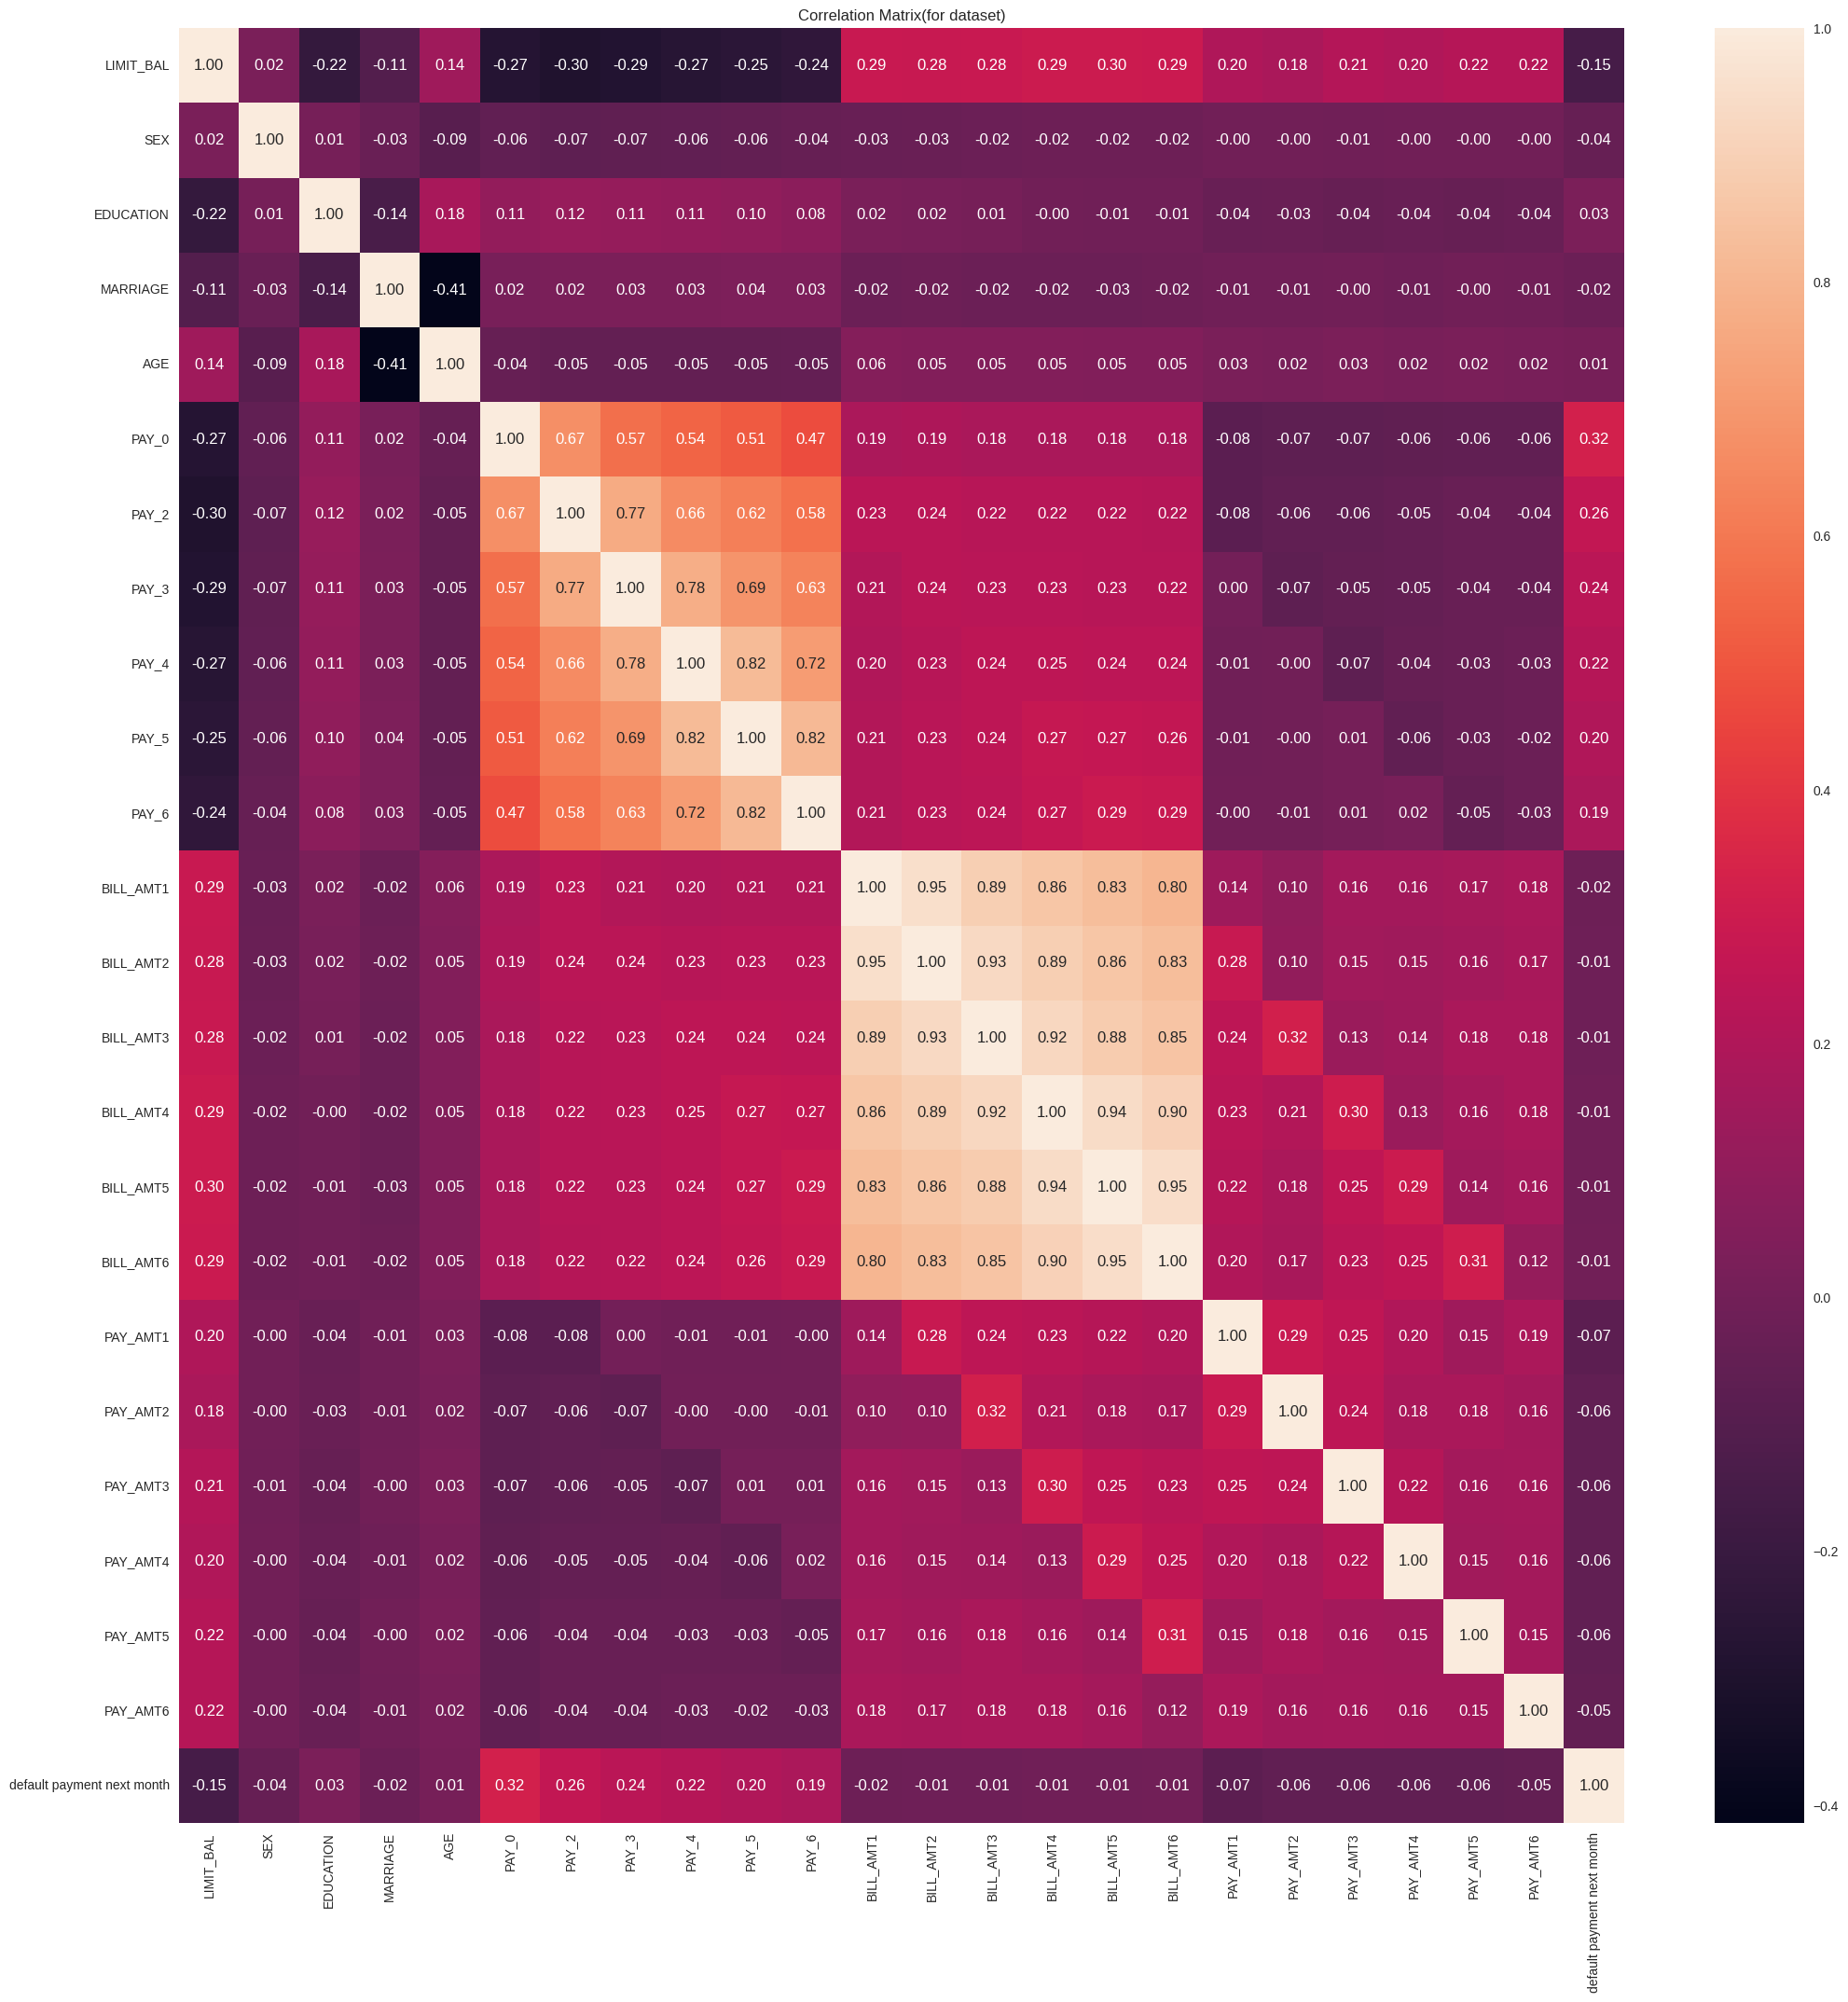

In [13]:
#Correlation for numeric
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.title("Correlation Matrix(for dataset)")

In [14]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month'], dtype='object')

In [15]:
df_num=df.select_dtypes(exclude ='object')
df_num.shape

(30000, 24)

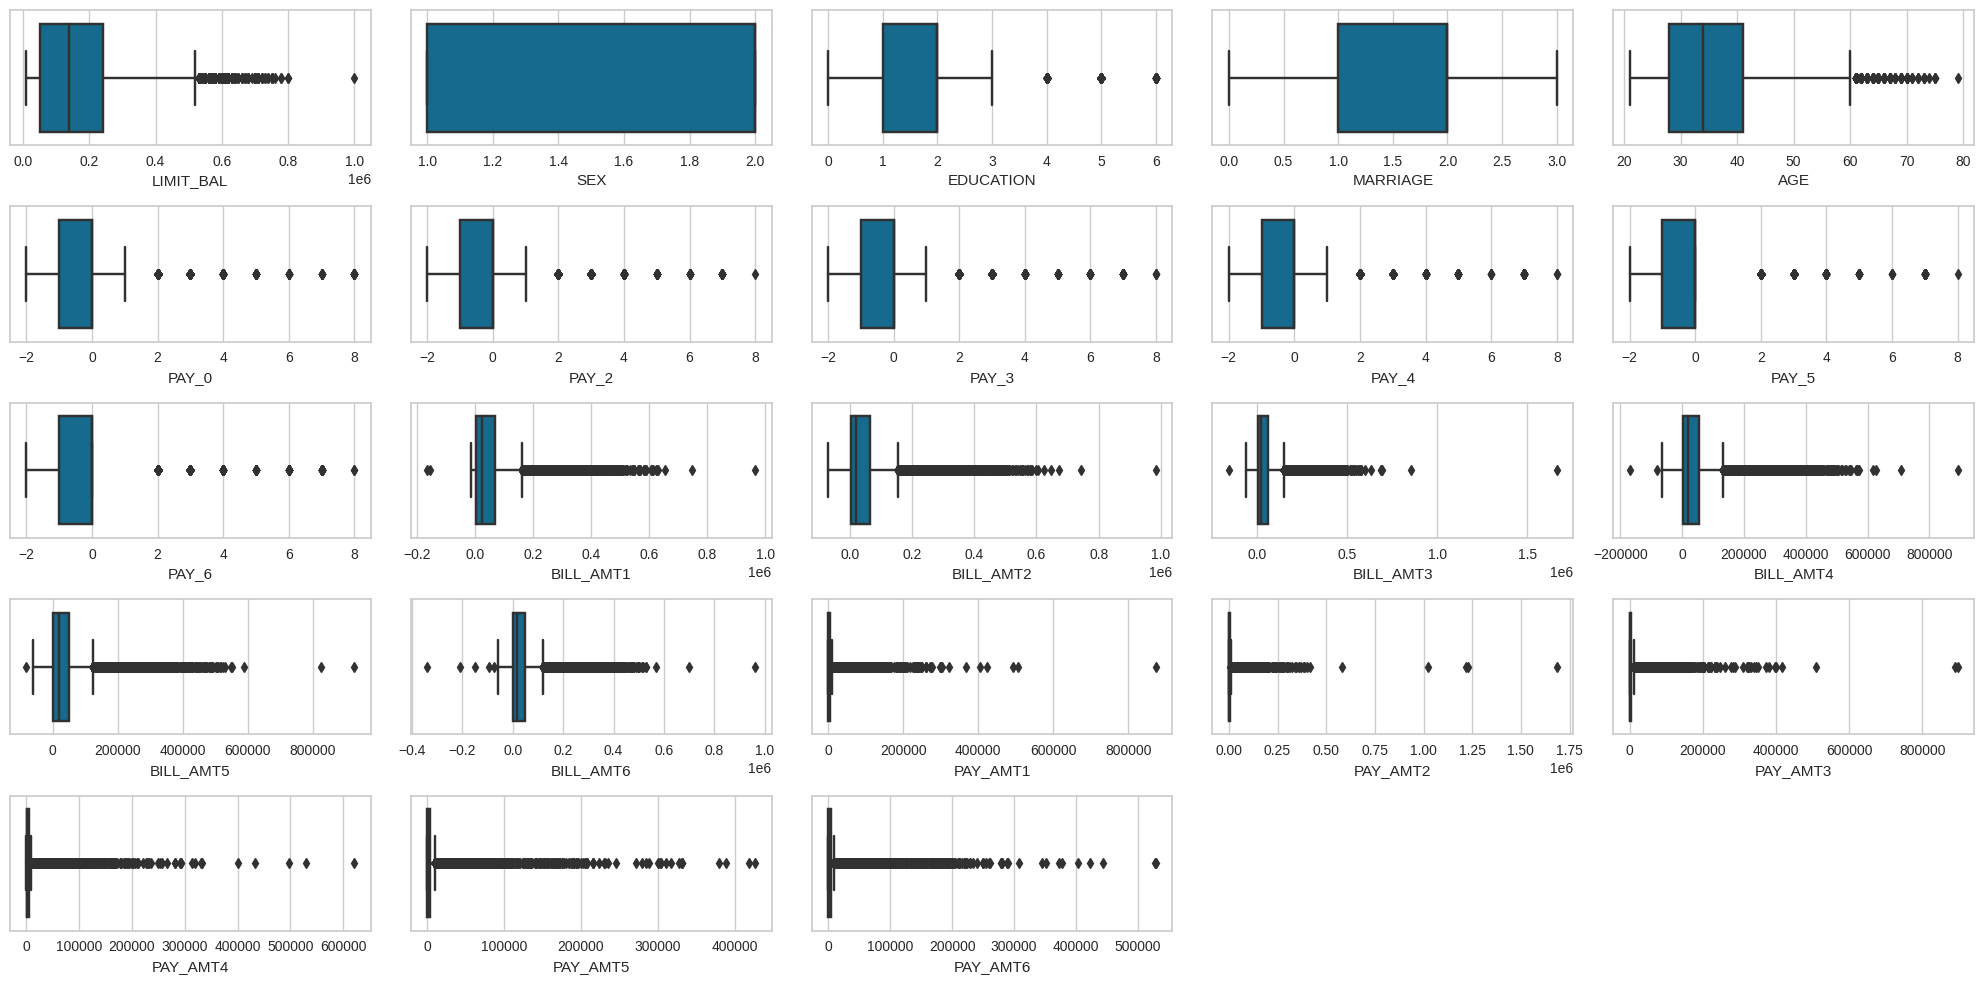

In [16]:
#Boxplot for checking of outliers
plt.figure(figsize=(20,10))
plotnumber = 1

for col in df_num.columns[:-1]:
    if plotnumber < 25:
        plt.subplot(5,5,plotnumber)
        sns.boxplot(df_num[col],orient='v')
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()


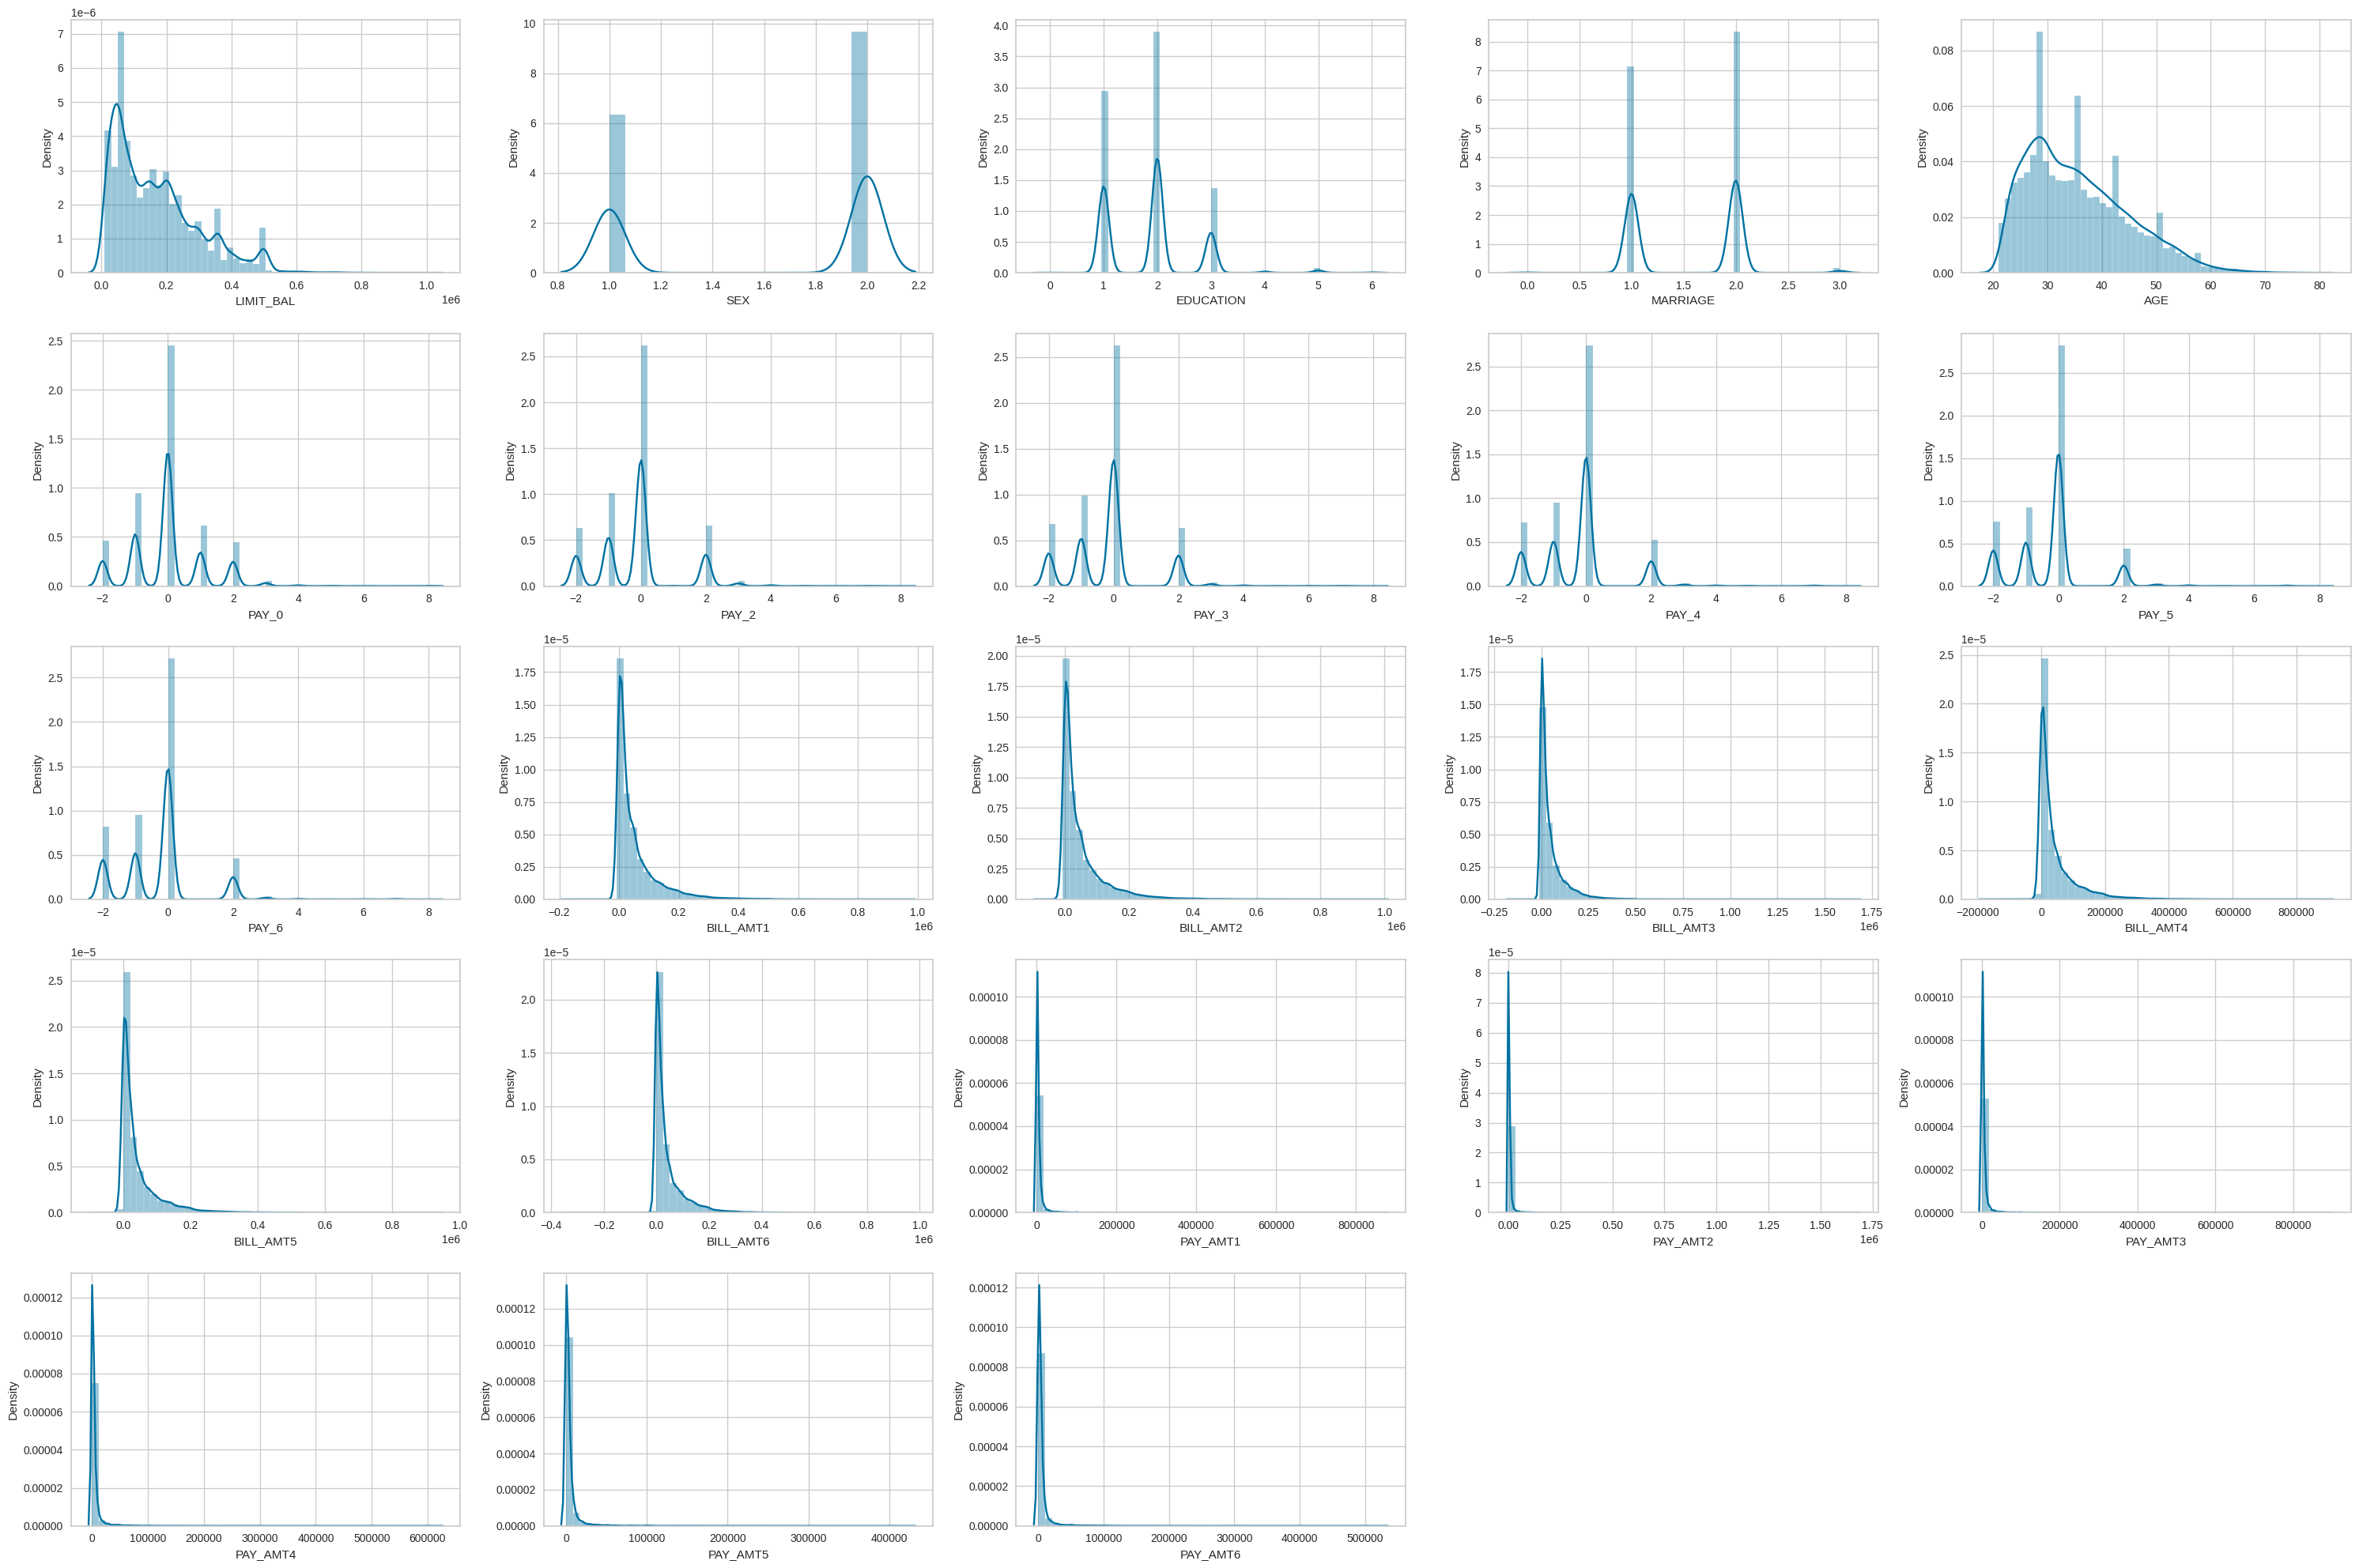

In [17]:
# histogram plot(for checking of skew,gaussian distribution)
plt.figure(figsize=(30,20))
plotnumber = 1

for col in df_num.columns[:-1]:
    if plotnumber < 25:
        plt.subplot(5,5,plotnumber)
        sns.distplot(df_num[col])
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()


In [18]:
df.shape

(30000, 24)

In [19]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [20]:
df['default payment next month'].value_counts(normalize = True)*100

0    77.88
1    22.12
Name: default payment next month, dtype: float64

# ANOMALY

<b>Pycaret<b/> :  is an open-source,low-code machine learning library in python that
automates machine learning workflows.

it is an end-to-end machine learning and model management tool that exponentially<br>
speeds up the experiment cycle and makes you more productive.<br>
compare with the other open-source machine learning libraries.<br><br><b>Pycaret<b> is an alternate low-code
library that can be used to replace hundreds of lines of code with few lines only.<br>

Pycaret is essentiall a Python wrapper around several machine learning<br> libraries and frameworks,
such as scikit-learn,XGBoost,LightGBM,CatBoost,spaCy,Optuna,Hyperopt,Ray,<br>
and a few more

In [21]:
from pycaret.anomaly import *

In [22]:
#set up environment final best result
history= setup(data=df,
                     silent=True,
                     normalize=True,
                     normalize_method='minmax',
                     transformation=True,
                     session_id=123)


,Description,Value
0,session_id,123
1,Original Data,"(30000, 24)"
2,Missing Values,False
3,Numeric Features,14
4,Categorical Features,10
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(30000, 93)"
9,CPU Jobs,-1


In [23]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [24]:
iforest = create_model('iforest')

In [25]:
iforest

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

In [26]:
iforest_assign = assign_model(iforest)



In [27]:
iforest_assign

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Anomaly,Anomaly_Score
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,0,-0.013360
1,120000,2,2,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,0,-0.045319
2,90000,2,2,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,-0.155392
3,50000,2,2,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,-0.153816
4,50000,1,2,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0,0,-0.056346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0,0,-0.097326
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,0,1837,3526,8998,129,0,0,0,0,-0.067382
29997,30000,1,2,2,37,4,3,2,-1,0,...,19357,0,0,22000,4200,2000,3100,1,0,-0.006104
29998,80000,1,3,1,41,1,-1,0,0,0,...,48944,85900,3409,1178,1926,52964,1804,1,0,-0.009584


# iforest

In [28]:
prediction_iforest = predict_model(iforest,data = df)
prediction_iforest

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Anomaly,Anomaly_Score
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,0,-0.013360
1,120000,2,2,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,0,-0.045319
2,90000,2,2,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,-0.155392
3,50000,2,2,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,-0.153816
4,50000,1,2,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0,0,-0.056346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0,0,-0.097326
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,0,1837,3526,8998,129,0,0,0,0,-0.067382
29997,30000,1,2,2,37,4,3,2,-1,0,...,19357,0,0,22000,4200,2000,3100,1,0,-0.006104
29998,80000,1,3,1,41,1,-1,0,0,0,...,48944,85900,3409,1178,1926,52964,1804,1,0,-0.009584


In [29]:
prediction_iforest[prediction_iforest['Anomaly'] ==1]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Anomaly,Anomaly_Score
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,13912,0,0,0,13007,1122,0,0,1,0.001168
17,320000,1,1,1,49,0,0,0,-1,-1,...,195599,10358,10000,75940,20000,195599,50000,0,1,0.028905
65,200000,1,1,1,57,-2,-2,-2,-1,2,...,7918,0,0,8222,300,0,1000,1,1,0.051132
90,200000,1,1,1,53,2,2,2,2,2,...,149531,6300,5500,5500,5500,5000,5000,1,1,0.038902
102,480000,1,1,1,63,0,0,0,2,2,...,469961,16078,55693,17000,0,18000,24200,0,1,0.052731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29906,150000,1,3,2,29,0,0,-1,-1,0,...,3270,46060,81620,184133,17322,3279,6222,0,1,0.000510
29921,410000,1,1,2,34,0,0,0,-1,-1,...,-15,17259,18600,1474,1428,0,0,1,1,0.008384
29963,610000,1,1,2,31,0,-1,2,-1,-1,...,269528,323014,1605,349395,250144,271099,220076,0,1,0.061845
29976,40000,1,2,2,47,2,2,3,2,2,...,46934,4000,0,2000,0,3520,0,1,1,0.020395


In [30]:
df = iforest_assign[iforest_assign['Anomaly'] ==0]
df.drop(columns = ['Anomaly','Anomaly_Score'],inplace = True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [31]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month'], dtype='object')

In [32]:
df['default payment next month'].value_counts()

0    22636
1     5864
Name: default payment next month, dtype: int64

In [33]:
df['default payment next month'].value_counts(normalize = True)*100

0    79.424561
1    20.575439
Name: default payment next month, dtype: float64

In [34]:
train, unseen = train_test_split(df,test_size=0.05, random_state=42,shuffle=True,stratify = df['default payment next month'])
train.shape, unseen.shape


((27075, 24), (1425, 24))

In [35]:
train['default payment next month'].value_counts()

0    21504
1     5571
Name: default payment next month, dtype: int64

In [36]:
train['default payment next month'].value_counts(normalize=True)*100

0    79.423823
1    20.576177
Name: default payment next month, dtype: float64

In [37]:
unseen['default payment next month'].value_counts()

0    1132
1     293
Name: default payment next month, dtype: int64

In [38]:
unseen['default payment next month'].value_counts(normalize=True)*100

0    79.438596
1    20.561404
Name: default payment next month, dtype: float64

In [39]:
from pycaret.classification import *

In [40]:
#set up environment
history = setup(data=train,
                     target='default payment next month',
                     silent=True,
                     normalize=True,
                     normalize_method='minmax',fold = 3,
                     transformation=True,
                     session_id=123)



,Description,Value
0,session_id,123
1,Target,default payment next month
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(27075, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [41]:
# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)


# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,geometric mean,fbeta_score,TT (Sec)
catboost,CatBoost Classifier,0.8223,0.7719,0.3156,0.6540,0.4255,0.3353,0.3666,0.6357,0.5491,0.3520,19.5833
gbc,Gradient Boosting Classifier,0.8230,0.7693,0.3106,0.6628,0.4226,0.3339,0.3676,0.6343,0.5454,0.3474,5.4367
lightgbm,Light Gradient Boosting Machine,0.8232,0.7669,0.3199,0.6579,0.4299,0.3398,0.3711,0.6379,0.5528,0.3564,0.8967
lr,Logistic Regression,0.8236,0.7620,0.3048,0.6716,0.4189,0.3318,0.3681,0.6326,0.5409,0.3420,6.1267
lda,Linear Discriminant Analysis,0.8246,0.7617,0.3341,0.6567,0.4427,0.3515,0.3799,0.6440,0.5644,0.3704,0.5367
rf,Random Forest Classifier,0.8202,0.7574,0.3166,0.6413,0.4236,0.3313,0.3605,0.6348,0.5492,0.3522,2.8567
ada,Ada Boost Classifier,0.8213,0.7570,0.2830,0.6712,0.3979,0.3127,0.3532,0.6231,0.5220,0.3199,1.7767
et,Extra Trees Classifier,0.8150,0.7418,0.3343,0.6029,0.4299,0.3301,0.3507,0.6380,0.5611,0.3670,3.4233
nb,Naive Bayes,0.8096,0.7404,0.3154,0.5950,0.4025,0.3038,0.3297,0.6276,0.5393,0.3443,0.1967
knn,K Neighbors Classifier,0.7974,0.6908,0.2843,0.5275,0.3693,0.2613,0.2791,0.6085,0.5149,0.3131,19.4367


# Undersampling

In [42]:
REEN = RepeatedEditedNearestNeighbours(sampling_strategy='auto',n_neighbors=3,max_iter=100,kind_sel='all',n_jobs=None,)
TL = TomekLinks(sampling_strategy= 'majority')
RUS = RandomUnderSampler(sampling_strategy= 'majority', random_state = 42)
ENN = EditedNearestNeighbours(sampling_strategy= 'majority')

In [43]:

#set up environment
history = setup(data=train,
                     target='default payment next month',
                     silent=True,
                     normalize=True,
                     normalize_method='minmax',
                     fold = 3,
                     fix_imbalance=True,fix_imbalance_method=REEN,
                     transformation=True,
                     session_id=123)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)


# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,geometric mean,fbeta_score,TT (Sec)
catboost,CatBoost Classifier,0.6969,0.7681,0.6965,0.3775,0.4896,0.3002,0.3286,0.6967,0.6967,0.5958,78.4733
gbc,Gradient Boosting Classifier,0.7182,0.7680,0.6657,0.3964,0.4967,0.3183,0.3389,0.6989,0.6980,0.5858,71.7300
lightgbm,Light Gradient Boosting Machine,0.6931,0.7670,0.6980,0.3739,0.4869,0.2955,0.3248,0.6949,0.6949,0.5949,70.0133
rf,Random Forest Classifier,0.7070,0.7617,0.6796,0.3854,0.4919,0.3075,0.3319,0.6969,0.6967,0.5896,77.7800
lr,Logistic Regression,0.7349,0.7611,0.6310,0.4119,0.4984,0.3289,0.3428,0.6967,0.6935,0.5703,69.9467
ada,Ada Boost Classifier,0.7212,0.7606,0.6487,0.3974,0.4928,0.3157,0.3337,0.6945,0.6930,0.5758,71.9233
lda,Linear Discriminant Analysis,0.7595,0.7557,0.5764,0.4417,0.5000,0.3454,0.3507,0.6921,0.6823,0.5432,71.8000
et,Extra Trees Classifier,0.6918,0.7529,0.6935,0.3721,0.4843,0.2920,0.3208,0.6924,0.6924,0.5913,70.4933
nb,Naive Bayes,0.8114,0.7496,0.2519,0.6185,0.3558,0.2684,0.3063,0.6054,0.4896,0.2851,70.8700
knn,K Neighbors Classifier,0.6644,0.7045,0.6495,0.3406,0.4468,0.2383,0.2639,0.6589,0.6588,0.5497,78.3700


In [44]:

#set up environment
history = setup(data=train,
                     target='default payment next month',
                     silent=True,
                     normalize=True,
                     normalize_method='minmax',
                     fold = 3,
                     fix_imbalance=True,fix_imbalance_method=TL,
                     transformation=True,
                     session_id=123)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)


# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,geometric mean,fbeta_score,TT (Sec)
catboost,CatBoost Classifier,0.8212,0.7725,0.3536,0.6275,0.4522,0.3551,0.3761,0.6490,0.5778,0.3873,31.6933
gbc,Gradient Boosting Classifier,0.8235,0.7706,0.3389,0.6475,0.4448,0.3519,0.3780,0.6451,0.5677,0.3746,22.2900
lightgbm,Light Gradient Boosting Machine,0.8210,0.7666,0.3571,0.6248,0.4542,0.3566,0.3767,0.6502,0.5803,0.3905,18.7000
lr,Logistic Regression,0.8236,0.7624,0.3321,0.6527,0.4400,0.3482,0.3764,0.6426,0.5625,0.3682,25.1267
lda,Linear Discriminant Analysis,0.8240,0.7615,0.3488,0.6451,0.4526,0.3587,0.3829,0.6490,0.5752,0.3840,17.8633
ada,Ada Boost Classifier,0.8227,0.7601,0.3252,0.6509,0.4335,0.3420,0.3711,0.6395,0.5569,0.3613,18.9367
rf,Random Forest Classifier,0.8171,0.7571,0.3541,0.6062,0.4468,0.3462,0.3642,0.6466,0.5766,0.3861,21.9167
nb,Naive Bayes,0.8088,0.7423,0.2064,0.6287,0.3084,0.2300,0.2789,0.5870,0.4446,0.2377,19.2433
et,Extra Trees Classifier,0.8104,0.7419,0.3738,0.5706,0.4514,0.3427,0.3541,0.6496,0.5881,0.4014,19.7600
knn,K Neighbors Classifier,0.7921,0.6949,0.3318,0.5033,0.3998,0.2805,0.2894,0.6226,0.5505,0.3560,41.8567


In [45]:

#set up environment
history = setup(data=train,
                     target='default payment next month',
                     silent=True,
                     normalize=True,
                     normalize_method='minmax',
                     fold = 3,
                     fix_imbalance=True,fix_imbalance_method=RUS,
                     transformation=True,
                     session_id=123)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)


# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,geometric mean,fbeta_score,TT (Sec)
catboost,CatBoost Classifier,0.7335,0.7691,0.6396,0.4113,0.5006,0.3304,0.3454,0.6989,0.6964,0.5756,10.1533
gbc,Gradient Boosting Classifier,0.7387,0.7669,0.6292,0.4168,0.5014,0.3342,0.3472,0.6984,0.6950,0.5710,2.9233
rf,Random Forest Classifier,0.7326,0.7619,0.6363,0.4097,0.4984,0.3277,0.3424,0.6972,0.6945,0.5729,1.2200
lr,Logistic Regression,0.7554,0.7617,0.5971,0.4372,0.5047,0.3475,0.3550,0.6971,0.6899,0.5564,0.5233
lightgbm,Light Gradient Boosting Machine,0.7145,0.7596,0.6517,0.3899,0.4879,0.3069,0.3264,0.6914,0.6902,0.5745,0.6033
lda,Linear Discriminant Analysis,0.7601,0.7577,0.5764,0.4428,0.5008,0.3465,0.3518,0.6925,0.6827,0.5435,0.2667
ada,Ada Boost Classifier,0.7330,0.7545,0.6075,0.4071,0.4872,0.3163,0.3281,0.6868,0.6820,0.5527,0.9200
et,Extra Trees Classifier,0.7238,0.7444,0.6176,0.3963,0.4828,0.3065,0.3205,0.6847,0.6814,0.5555,1.0567
nb,Naive Bayes,0.7981,0.7416,0.1027,0.5924,0.1737,0.1203,0.1818,0.5420,0.3150,0.1227,0.1433
knn,K Neighbors Classifier,0.6725,0.7002,0.6194,0.3427,0.4412,0.2359,0.2565,0.6530,0.6521,0.5332,10.4233


In [46]:
#set up environment
history = setup(data=train,
                     target='default payment next month',
                     silent=True,
                     normalize=True,
                     normalize_method='minmax',
                     fold = 3,
                     fix_imbalance=True,fix_imbalance_method=ENN,
                     transformation=True,
                     session_id=123)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)


# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,geometric mean,fbeta_score,TT (Sec)
catboost,CatBoost Classifier,0.7880,0.7737,0.5536,0.4932,0.5216,0.3861,0.3872,0.7017,0.6859,0.5403,28.7800
gbc,Gradient Boosting Classifier,0.7957,0.7713,0.5266,0.5109,0.5185,0.3889,0.3891,0.6966,0.6755,0.5233,22.4200
lightgbm,Light Gradient Boosting Machine,0.7799,0.7684,0.5501,0.4763,0.5105,0.3695,0.3711,0.6953,0.6799,0.5335,18.5867
rf,Random Forest Classifier,0.7848,0.7668,0.5435,0.4862,0.5132,0.3756,0.3766,0.6959,0.6790,0.5309,17.6800
lr,Logistic Regression,0.7993,0.7639,0.5053,0.5202,0.5125,0.3863,0.3864,0.6911,0.6656,0.5081,17.0933
ada,Ada Boost Classifier,0.7926,0.7636,0.5109,0.5035,0.5070,0.3757,0.3758,0.6889,0.6655,0.5093,17.9067
lda,Linear Discriminant Analysis,0.8026,0.7606,0.4815,0.5299,0.5045,0.3816,0.3823,0.6844,0.6536,0.4905,19.5067
et,Extra Trees Classifier,0.7708,0.7546,0.5574,0.4597,0.5038,0.3566,0.3594,0.6922,0.6790,0.5346,22.5467
nb,Naive Bayes,0.8076,0.7482,0.1664,0.6548,0.2643,0.1967,0.2589,0.5715,0.4022,0.1953,16.1900
knn,K Neighbors Classifier,0.7398,0.7094,0.5200,0.4041,0.4547,0.2874,0.2914,0.6589,0.6441,0.4917,32.3933


# Oversampling

In [47]:
ROS = RandomOverSampler(sampling_strategy='minority', random_state = 42)
ADA = ADASYN(sampling_strategy='minority',random_state=42,n_neighbors=5,n_jobs=None,)

In [48]:

#set up environment
history = setup(data=train,
                     target='default payment next month',
                     silent=True,
                     normalize=True,
                     normalize_method='minmax',
                     fold = 3,
                     fix_imbalance=True,fix_imbalance_method=ROS,
                     transformation=True,
                     session_id=123)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)


# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,geometric mean,fbeta_score,TT (Sec)
gbc,Gradient Boosting Classifier,0.7559,0.7684,0.6100,0.4391,0.5106,0.3537,0.3622,0.7022,0.6961,0.5659,9.6200
lightgbm,Light Gradient Boosting Machine,0.7598,0.7656,0.5807,0.4427,0.5023,0.3478,0.3534,0.6938,0.6845,0.5465,0.8333
catboost,CatBoost Classifier,0.7729,0.7640,0.5642,0.4640,0.5091,0.3633,0.3663,0.6961,0.6835,0.5408,21.8167
lr,Logistic Regression,0.7559,0.7620,0.5918,0.4375,0.5030,0.3461,0.3530,0.6955,0.6877,0.5528,1.8967
lda,Linear Discriminant Analysis,0.7638,0.7587,0.5736,0.4484,0.5033,0.3514,0.3560,0.6938,0.6833,0.5433,0.9033
ada,Ada Boost Classifier,0.7402,0.7575,0.6009,0.4157,0.4913,0.3247,0.3347,0.6889,0.6833,0.5516,3.0533
rf,Random Forest Classifier,0.8134,0.7571,0.3819,0.5816,0.4608,0.3537,0.3653,0.6545,0.5950,0.4099,4.9600
et,Extra Trees Classifier,0.8159,0.7403,0.3280,0.6109,0.4265,0.3285,0.3513,0.6363,0.5566,0.3614,4.8333
nb,Naive Bayes,0.8095,0.7393,0.3369,0.5839,0.4210,0.3179,0.3380,0.6355,0.5579,0.3654,0.1767
knn,K Neighbors Classifier,0.6611,0.6748,0.5926,0.3277,0.4220,0.2095,0.2279,0.6359,0.6344,0.5101,31.8267


In [49]:
#set up environment
history = setup(data=train,
                     target='default payment next month',
                     silent=True,
                     normalize=True,
                     normalize_method='minmax',
                     fold = 3,
                     fix_imbalance=True,fix_imbalance_method=ADA,
                     transformation=True,
                     session_id=123)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)


# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,geometric mean,fbeta_score,TT (Sec)
catboost,CatBoost Classifier,0.8194,0.7599,0.3622,0.6151,0.4557,0.3559,0.3741,0.6510,0.5834,0.3945,41.5900
lightgbm,Light Gradient Boosting Machine,0.8138,0.7586,0.3827,0.5837,0.4619,0.3552,0.3670,0.6551,0.5957,0.4108,8.0833
gbc,Gradient Boosting Classifier,0.8063,0.7585,0.4365,0.5471,0.4849,0.3675,0.3715,0.6702,0.6280,0.4545,16.7867
lr,Logistic Regression,0.7156,0.7582,0.6434,0.3900,0.4856,0.3051,0.3234,0.6890,0.6875,0.5694,10.2633
lda,Linear Discriminant Analysis,0.7226,0.7564,0.6280,0.3961,0.4857,0.3089,0.3243,0.6877,0.6850,0.5621,8.2433
rf,Random Forest Classifier,0.8026,0.7508,0.4143,0.5357,0.4671,0.3484,0.3528,0.6596,0.6122,0.4339,12.1200
ada,Ada Boost Classifier,0.7795,0.7424,0.4965,0.4732,0.4845,0.3444,0.3446,0.6753,0.6512,0.4916,10.8833
nb,Naive Bayes,0.7197,0.7423,0.5592,0.4718,0.4683,0.3066,0.3303,0.6606,0.6242,0.5011,8.1333
et,Extra Trees Classifier,0.8009,0.7342,0.3854,0.5323,0.4469,0.3293,0.3358,0.6479,0.5923,0.4078,12.7333
knn,K Neighbors Classifier,0.6302,0.6732,0.6376,0.3115,0.4185,0.1920,0.2184,0.6329,0.6329,0.5272,38.6267


# SMOTE

In [50]:
#set up environment
history = setup(data=train,
                     target='default payment next month',
                     silent=True,
                     normalize=True,
                     normalize_method='minmax',
                     fold = 3,
                     fix_imbalance=True,
                     transformation=True,
                     session_id=123)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,fbeta_score,TT (Sec)
gbc,Gradient Boosting Classifier,0.8071,0.7621,0.4428,0.5482,0.4895,0.3723,0.3757,0.6730,0.4603,12.0233
lightgbm,Light Gradient Boosting Machine,0.8153,0.7619,0.3862,0.5883,0.4661,0.3601,0.3719,0.6573,0.4146,3.7067
catboost,CatBoost Classifier,0.8184,0.7607,0.3629,0.6101,0.4549,0.3542,0.3716,0.6507,0.3948,38.3533
lr,Logistic Regression,0.7406,0.7603,0.6133,0.4175,0.4968,0.3305,0.3416,0.6937,0.5607,4.8433
lda,Linear Discriminant Analysis,0.7499,0.7576,0.5986,0.4289,0.4997,0.3390,0.3474,0.6942,0.5547,1.9867
rf,Random Forest Classifier,0.8065,0.7504,0.4112,0.5490,0.4701,0.3547,0.3603,0.6609,0.4329,6.7900
ada,Ada Boost Classifier,0.7823,0.7452,0.5063,0.4809,0.4926,0.3543,0.3549,0.6807,0.5006,4.1000
nb,Naive Bayes,0.7947,0.7384,0.4562,0.5317,0.4787,0.3544,0.3629,0.6701,0.4624,1.4533
et,Extra Trees Classifier,0.8037,0.7344,0.3877,0.5420,0.4520,0.3364,0.3435,0.6505,0.4111,7.7933
knn,K Neighbors Classifier,0.6504,0.6804,0.6196,0.3238,0.4253,0.2083,0.2309,0.6391,0.5238,34.1400


# Oversampling and Undersampling

In [51]:
SMTN = SMOTEENN(random_state=42,enn=EditedNearestNeighbours(sampling_strategy= 'majority'))

In [52]:

#set up environment
history = setup(data=train,
                     target='default payment next month',
                     silent=True,
                     normalize=True,
                     normalize_method='minmax',
                     fold = 3,
                     fix_imbalance=True,fix_imbalance_method=SMTN,
                     transformation=True,
                     session_id=123)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)


# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,geometric mean,fbeta_score,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6984,0.7676,0.6821,0.3770,0.4855,0.2965,0.3226,0.6924,0.6923,0.5870,26.1667
gbc,Gradient Boosting Classifier,0.6392,0.7668,0.7564,0.3374,0.4667,0.2504,0.2971,0.6824,0.6783,0.6059,37.0300
catboost,CatBoost Classifier,0.7063,0.7663,0.6831,0.3852,0.4926,0.3079,0.3329,0.6977,0.6976,0.5916,57.2500
lr,Logistic Regression,0.5589,0.7637,0.8349,0.2999,0.4413,0.1937,0.2643,0.6605,0.6371,0.6153,30.0767
rf,Random Forest Classifier,0.6990,0.7623,0.6892,0.3786,0.4887,0.3002,0.3272,0.6954,0.6953,0.5920,32.3733
ada,Ada Boost Classifier,0.6063,0.7538,0.7676,0.3168,0.4485,0.2174,0.2693,0.6657,0.6578,0.5976,28.3733
lda,Linear Discriminant Analysis,0.5320,0.7523,0.8432,0.2878,0.4292,0.1714,0.2443,0.6466,0.6159,0.6084,26.9467
et,Extra Trees Classifier,0.7026,0.7508,0.6634,0.3787,0.4822,0.2948,0.3175,0.6881,0.6877,0.5767,26.3000
nb,Naive Bayes,0.8097,0.7492,0.1884,0.6529,0.2923,0.2193,0.2765,0.5809,0.4282,0.2196,26.1300
knn,K Neighbors Classifier,0.5407,0.6826,0.7802,0.2826,0.4149,0.1565,0.2120,0.6289,0.6104,0.5770,45.6000


# Ensemble Algorithms

In [53]:

#set up environment
history = setup(data=train,
                     target='default payment next month',
                     silent=True,
                     normalize=True,
                     normalize_method='minmax',
                     fold = 3,
                     transformation=True,
                     session_id=123)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)


# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)


BBC = BalancedBaggingClassifier(sampling_strategy='auto',random_state = 42)
BRF = BalancedRandomForestClassifier(sampling_strategy='auto',random_state = 42)
EEC = EasyEnsembleClassifier(sampling_strategy='auto',random_state = 42)
RUS = RUSBoostClassifier(sampling_strategy='auto',random_state = 42)

# train using cross validation
best = compare_models(include = [BBC,BRF,EEC,RUS],sort='auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,geometric mean,fbeta_score,TT (Sec)
1,Random Forest Classifier,0.7365,0.7678,0.6394,0.4150,0.5032,0.3349,0.3494,0.7007,0.6980,0.5769,2.6933
2,Bagging Classifier,0.7426,0.7612,0.6141,0.4203,0.4990,0.3339,0.3448,0.6953,0.6905,0.5622,8.6967
3,Ada Boost Classifier,0.7276,0.7530,0.6227,0.4017,0.4883,0.3143,0.3283,0.6889,0.6857,0.5609,1.0667
0,Bagging Classifier,0.7595,0.7264,0.5020,0.4343,0.4656,0.3115,0.3130,0.6647,0.6444,0.4867,10.8300


In [42]:
RUS = RandomUnderSampler(sampling_strategy= 'majority', random_state = 42)
#set up environment
history = setup(data=train,
                     target='default payment next month',
                     silent=True,
                     normalize=True,
                     normalize_method='minmax',fold_shuffle = True,
                     fold = 3,
                     fix_imbalance=True,fix_imbalance_method=RUS,
                     transformation=True,
                     session_id=123)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)


# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='auc')



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,geometric mean,fbeta_score,TT (Sec)
catboost,CatBoost Classifier,0.7308,0.7701,0.6477,0.4084,0.5009,0.3293,0.3458,0.7002,0.6982,0.5797,9.8267
gbc,Gradient Boosting Classifier,0.7397,0.7687,0.6386,0.4187,0.5058,0.3393,0.3532,0.7024,0.6995,0.5779,2.0367
lightgbm,Light Gradient Boosting Machine,0.7130,0.7630,0.6606,0.3893,0.4899,0.3083,0.3292,0.6937,0.6929,0.5798,0.4500
lr,Logistic Regression,0.7522,0.7621,0.6047,0.4328,0.5044,0.3452,0.3539,0.6979,0.6915,0.5601,0.5667
lda,Linear Discriminant Analysis,0.7580,0.7588,0.5895,0.4404,0.5041,0.3485,0.3550,0.6960,0.6877,0.5521,0.3767
rf,Random Forest Classifier,0.7310,0.7586,0.6320,0.4068,0.4949,0.3231,0.3378,0.6945,0.6916,0.5690,1.2900
ada,Ada Boost Classifier,0.7292,0.7570,0.6204,0.4036,0.4886,0.3157,0.3295,0.6891,0.6852,0.5597,0.6100
et,Extra Trees Classifier,0.7223,0.7432,0.6201,0.3947,0.4823,0.3052,0.3198,0.6847,0.6816,0.5565,1.7933
nb,Naive Bayes,0.7947,0.7403,0.0835,0.5531,0.1450,0.0955,0.1528,0.5328,0.2863,0.1005,0.1567
knn,K Neighbors Classifier,0.6688,0.6974,0.6173,0.3388,0.4374,0.2300,0.2509,0.6499,0.6489,0.5301,10.4867


# Final Preparation

In [73]:
RUS = RandomUnderSampler(sampling_strategy= 'majority', random_state = 42)
#set up environment
history = setup(data=train,
                     target='default payment next month',
                     silent=True,
                     normalize=True,
                     normalize_method='minmax',
                     fold = 10,
                     fix_imbalance=True,fix_imbalance_method=RUS,
                     transformation=True,
                     session_id=123)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)


# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,geometric mean,fbeta_score,TT (Sec)
catboost,CatBoost Classifier,0.7330,0.7696,0.6313,0.4097,0.4967,0.3261,0.3403,0.6955,0.6924,0.5695,11.5470
gbc,Gradient Boosting Classifier,0.7423,0.7686,0.6275,0.4216,0.5042,0.3392,0.3515,0.7000,0.6962,0.5715,3.1300
lightgbm,Light Gradient Boosting Machine,0.7196,0.7655,0.6452,0.3949,0.4898,0.3117,0.3296,0.6922,0.6905,0.5725,0.4090
lr,Logistic Regression,0.7542,0.7615,0.6057,0.4364,0.5072,0.3492,0.3576,0.6995,0.6932,0.5620,0.7370
rf,Random Forest Classifier,0.7338,0.7605,0.6224,0.4097,0.4940,0.3237,0.3368,0.6928,0.6891,0.5637,1.5590
lda,Linear Discriminant Analysis,0.7598,0.7587,0.5878,0.4433,0.5053,0.3508,0.3570,0.6964,0.6878,0.5517,0.2780
ada,Ada Boost Classifier,0.7381,0.7575,0.6080,0.4142,0.4923,0.3246,0.3356,0.6902,0.6851,0.5556,0.8450
et,Extra Trees Classifier,0.7239,0.7451,0.6153,0.3966,0.4821,0.3059,0.3197,0.6839,0.6804,0.5540,1.6740
nb,Naive Bayes,0.7967,0.7429,0.0953,0.5731,0.1620,0.1104,0.1692,0.5385,0.3023,0.1141,0.0780
knn,K Neighbors Classifier,0.6658,0.7037,0.6272,0.3382,0.4393,0.2307,0.2531,0.6516,0.6510,0.5355,3.5750


In [84]:
catboost_AUC = create_model('catboost')



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,geometric mean,fbeta_score
Fold,,,,,,,,,,
0,0.7447,0.7886,0.6439,0.4264,0.5131,0.3496,0.3633,0.7076,0.7048,0.5843
1,0.7379,0.7726,0.6313,0.4160,0.5015,0.3337,0.3471,0.6987,0.6954,0.5721
2,0.7599,0.7855,0.6506,0.4477,0.5304,0.3765,0.3883,0.7196,0.7163,0.5966
3,0.7377,0.7731,0.6203,0.4139,0.4965,0.3286,0.3409,0.6945,0.6905,0.5640
4,0.7309,0.7768,0.6582,0.4094,0.5049,0.3336,0.3513,0.7041,0.7026,0.5869
5,0.7351,0.7602,0.6177,0.4101,0.4929,0.3234,0.3358,0.6919,0.6879,0.5609
6,0.7251,0.7568,0.6203,0.3977,0.4847,0.3092,0.3234,0.6865,0.6833,0.5578
7,0.7156,0.7594,0.6152,0.3857,0.4741,0.2930,0.3080,0.6786,0.6756,0.5498
8,0.7208,0.7553,0.5909,0.3894,0.4694,0.2907,0.3024,0.6730,0.6680,0.5355


In [85]:
lightgbm_F_beta = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,geometric mean,fbeta_score
Fold,,,,,,,,,,
0,0.7226,0.7805,0.6717,0.4018,0.5028,0.3269,0.3477,0.7039,0.7031,0.5922
1,0.7199,0.7652,0.6540,0.3966,0.4938,0.3159,0.3348,0.6957,0.6944,0.5789
2,0.7340,0.7795,0.6329,0.4105,0.4980,0.3281,0.3423,0.6968,0.6939,0.5710
3,0.7314,0.7723,0.6506,0.4092,0.5024,0.3313,0.3480,0.7016,0.6998,0.5820
4,0.7314,0.7728,0.6684,0.4112,0.5092,0.3384,0.3573,0.7082,0.7071,0.5941
5,0.7135,0.7583,0.6380,0.3865,0.4814,0.2995,0.3175,0.6857,0.6840,0.5645
6,0.7077,0.7497,0.6127,0.3764,0.4663,0.2805,0.2963,0.6727,0.6700,0.5443
7,0.7103,0.7540,0.6380,0.3830,0.4786,0.2950,0.3134,0.6837,0.6821,0.5630
8,0.7129,0.7574,0.6111,0.3829,0.4708,0.2878,0.3026,0.6755,0.6724,0.5460


In [105]:
bayesian_lightgbm = tune_model(lightgbm_F_beta,
          search_library = "tune-sklearn",
          search_algorithm = "bayesian",
          n_iter = 50,
          optimize = 'fbeta_score')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,geometric mean,fbeta_score
Fold,,,,,,,,,,
0,0.7057,0.7672,0.6843,0.3849,0.4927,0.3076,0.3329,0.6978,0.6977,0.5922
1,0.7078,0.7538,0.6540,0.3831,0.4832,0.2984,0.3191,0.6880,0.6872,0.5730
2,0.7150,0.7741,0.6785,0.3935,0.4981,0.3183,0.3413,0.7016,0.7012,0.5927
3,0.7108,0.7639,0.6684,0.3877,0.4907,0.3082,0.3305,0.6952,0.6947,0.5838
4,0.7092,0.7641,0.6759,0.3870,0.4922,0.3090,0.3326,0.6970,0.6967,0.5881
5,0.6987,0.7474,0.6329,0.3698,0.4669,0.2765,0.2959,0.6745,0.6732,0.5541
6,0.6955,0.7498,0.6557,0.3700,0.4731,0.2816,0.3044,0.6808,0.6804,0.5680
7,0.7003,0.7535,0.6633,0.3759,0.4799,0.2913,0.3144,0.6866,0.6862,0.5753
8,0.7082,0.7447,0.6515,0.3834,0.4827,0.2980,0.3183,0.6873,0.6864,0.5716


In [109]:
import warnings
warnings.filterwarnings("ignore")
hyperopt_lightgbm = tune_model(lightgbm_F_beta,
          search_library = "tune-sklearn",
          search_algorithm = "hyperopt",
          n_iter = 5,
          optimize = 'fbeta_score')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,geometric mean,fbeta_score
Fold,,,,,,,,,,
0,0.7474,0.7897,0.6540,0.4309,0.5196,0.3579,0.3722,0.7130,0.7106,0.5927
1,0.7458,0.7706,0.6136,0.4248,0.5021,0.3389,0.3492,0.6972,0.6921,0.5635
2,0.7641,0.7878,0.6557,0.4544,0.5368,0.3855,0.3971,0.7242,0.7209,0.6023
3,0.7499,0.7819,0.6253,0.4311,0.5103,0.3499,0.3608,0.7040,0.6996,0.5736
4,0.7493,0.7751,0.6430,0.4320,0.5168,0.3563,0.3691,0.7102,0.7070,0.5858
5,0.7383,0.7599,0.6101,0.4134,0.4928,0.3251,0.3363,0.6911,0.6863,0.5571
6,0.7335,0.7574,0.6152,0.4077,0.4904,0.3199,0.3323,0.6899,0.6859,0.5584
7,0.7277,0.7607,0.6329,0.4026,0.4921,0.3185,0.3337,0.6928,0.6902,0.5679
8,0.7303,0.7599,0.6061,0.4034,0.4844,0.3116,0.3235,0.6846,0.6801,0.5507


(raylet) [2022-12-06 01:02:06,283 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2839089152; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:02:16,299 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2839105536; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:02:26,309 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2839076864; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:02:36,321 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2839076864; capacity: 82031734784. Object creation will fail i

[LightGBM] [Warning] bagging_fraction is set=0.7078750819469858, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7078750819469858
[LightGBM] [Warning] feature_fraction is set=0.6682470001755085, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6682470001755085
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.7078750819469858, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7078750819469858
[LightGBM] [Warning] feature_fraction is set=0.6682470001755085, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6682470001755085
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


(raylet) [2022-12-06 01:03:26,364 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2839023616; capacity: 82031734784. Object creation will fail if spilling is required.


[LightGBM] [Warning] bagging_fraction is set=0.7078750819469858, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7078750819469858
[LightGBM] [Warning] feature_fraction is set=0.6682470001755085, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6682470001755085
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.7078750819469858, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7078750819469858
[LightGBM] [Warning] feature_fraction is set=0.6682470001755085, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6682470001755085
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.7078750819469858, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7078750819469858
[LightGBM] [Warning] feature_fracti

(raylet) [2022-12-06 01:03:36,372 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2839023616; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:03:46,380 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2839019520; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:03:56,388 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2839019520; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:04:06,395 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2839019520; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 01:08:46,696 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2837016576; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:08:56,705 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2836967424; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:09:06,713 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2836905984; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:09:16,722 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2836877312; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 01:13:57,077 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2835771392; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:14:07,094 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2832265216; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:14:17,104 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2832195584; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:14:27,114 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2832162816; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 01:19:07,494 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2835173376; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:19:17,509 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2835152896; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:19:27,535 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2835103744; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:19:37,550 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2835099648; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 01:24:17,957 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2831237120; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:24:27,971 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2831192064; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:24:37,989 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2834665472; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:24:48,004 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2834649088; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 01:29:28,399 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2830950400; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:29:38,415 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2830901248; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:29:48,426 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2830843904; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:29:58,438 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2834489344; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 01:34:38,777 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2830602240; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:34:48,801 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2830602240; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:34:58,819 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2830602240; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:35:08,833 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2830598144; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 01:39:49,240 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2833760256; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:39:59,245 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2833760256; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:40:09,255 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2833760256; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:40:19,272 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2833756160; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 01:44:59,681 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2830036992; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:45:09,693 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2830036992; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:45:19,714 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2830024704; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:45:29,724 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2829967360; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 01:50:10,194 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2829750272; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:50:20,204 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2829742080; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:50:30,220 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2829709312; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:50:40,235 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2829869056; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 01:55:20,644 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2832965632; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:55:30,658 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2832961536; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:55:40,678 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2832961536; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 01:55:50,694 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2832961536; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 02:00:31,064 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2829176832; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:00:41,079 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2829168640; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:00:51,095 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2829164544; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:01:01,113 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2829164544; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 02:05:41,491 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2832429056; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:05:51,503 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2832424960; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:06:01,516 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2832420864; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:06:11,532 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2832420864; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 02:10:51,914 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2828664832; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:11:01,931 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2828664832; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:11:11,944 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2828660736; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:11:21,958 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2828648448; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 02:16:02,334 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2828365824; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:16:12,343 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2828365824; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:16:22,357 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2828353536; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:16:32,372 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2828333056; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 02:21:12,755 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2828115968; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:21:22,765 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2828271616; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:21:32,777 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2828238848; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:21:42,789 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2828230656; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 02:26:23,150 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2831323136; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:26:33,186 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2831294464; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:26:43,199 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2831290368; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:26:53,211 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2831273984; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 02:31:33,596 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2827341824; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:31:43,607 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2827325440; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:31:53,623 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2827321344; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:32:03,642 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2827313152; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 02:36:43,955 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2830352384; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:36:53,966 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2830352384; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:37:03,983 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2830352384; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:37:13,994 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2830348288; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 02:41:54,417 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2826522624; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:42:04,426 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2830082048; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:42:14,436 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2830073856; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:42:24,445 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2830057472; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 02:47:04,728 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2829852672; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:47:14,735 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2829848576; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:47:24,752 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2829815808; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:47:34,765 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2823131136; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 02:52:15,176 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2822914048; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:52:25,188 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2822897664; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:52:35,198 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2829565952; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:52:45,208 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2829553664; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 02:57:25,514 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2829115392; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:57:35,525 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2829107200; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:57:45,537 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2829107200; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 02:57:55,547 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2829107200; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 03:02:35,949 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2822041600; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:02:45,959 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2822037504; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:02:55,971 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2822033408; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:03:05,987 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2822033408; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 03:07:46,332 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2821734400; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:07:56,344 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2821730304; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:08:06,356 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2821726208; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:08:16,369 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2821718016; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 03:12:56,692 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2828144640; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:13:06,700 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2828140544; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:13:16,707 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2828132352; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:13:26,715 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2828083200; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 03:18:07,042 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2827722752; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:18:17,053 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2827665408; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:18:27,062 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2827649024; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:18:37,070 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2827649024; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 03:23:17,489 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2820771840; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:23:27,502 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2820747264; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:23:37,522 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2820747264; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:23:47,545 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2820747264; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 03:28:27,931 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2820509696; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:28:37,947 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2820509696; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:28:47,965 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2820497408; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:28:57,990 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2820460544; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 03:33:38,499 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2819756032; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:33:48,515 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2819751936; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:33:58,526 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2819751936; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:34:08,537 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2819747840; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 03:38:48,980 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2819514368; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:38:58,999 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2819510272; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:39:09,010 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2819510272; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:39:19,020 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2819502080; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 03:43:59,450 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2819284992; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:44:09,468 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2819280896; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:44:19,481 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2819272704; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:44:29,493 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2819411968; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 03:49:09,843 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2825736192; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:49:19,851 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2825728000; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:49:29,930 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2825687040; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:49:39,944 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2825687040; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 03:54:20,241 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2818789376; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:54:30,259 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2818764800; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:54:40,275 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2818764800; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:54:50,293 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2818760704; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 03:59:30,653 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2818539520; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:59:40,664 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2818539520; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 03:59:50,676 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2818539520; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:00:00,690 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2818539520; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 04:04:41,055 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2818338816; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:04:51,069 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2818334720; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:05:01,085 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2818314240; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:05:11,097 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2818314240; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 04:09:51,480 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2818125824; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:10:01,493 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2818125824; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:10:11,506 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2818121728; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:10:21,519 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2818113536; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 04:15:01,910 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2824577024; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:15:11,919 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2824577024; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:15:21,929 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2824568832; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:15:31,938 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2824531968; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 04:20:12,189 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2823946240; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:20:22,199 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2823933952; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:20:32,209 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2823905280; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:20:42,221 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2823880704; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 04:25:22,579 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2823323648; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:25:32,591 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2823282688; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:25:42,606 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2823233536; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:25:52,616 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2823184384; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 04:30:32,976 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2814259200; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:30:42,993 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2814214144; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:30:53,004 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2814173184; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:31:03,014 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2814136320; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 04:35:43,398 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2813538304; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:35:53,412 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2813530112; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:36:03,424 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2813501440; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:36:13,436 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2813464576; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 04:40:53,828 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2812923904; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:41:03,845 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2812899328; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:41:13,856 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2812837888; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:41:23,869 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2812792832; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 04:46:04,226 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2812243968; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:46:14,237 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2805547008; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:46:24,248 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2805522432; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:46:34,258 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2805510144; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 04:51:14,584 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2811867136; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:51:24,595 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2811846656; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:51:34,606 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2811830272; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:51:44,617 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2811789312; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 04:56:24,956 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2811404288; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:56:34,965 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2811375616; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:56:44,977 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2811367424; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 04:56:54,988 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2811359232; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 05:01:35,321 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2804281344; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:01:45,334 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2804277248; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:01:55,348 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2804277248; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:02:05,366 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2804277248; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 05:06:45,690 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2810531840; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:06:55,700 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2810519552; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:07:05,711 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2803834880; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:07:15,722 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2803826688; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 05:11:56,102 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2810097664; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:12:06,115 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2810089472; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:12:16,126 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2810077184; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:12:26,138 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2810048512; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 05:17:06,507 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2809683968; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:17:16,519 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2809671680; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:17:26,531 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2809655296; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:17:36,544 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2809622528; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 05:22:16,885 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2809253888; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:22:26,897 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2809237504; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:22:36,909 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2809208832; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:22:46,921 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2809200640; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 05:27:27,262 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2808827904; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:27:37,274 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2808791040; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:27:47,287 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2808786944; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:27:57,300 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2808782848; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 05:32:37,627 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2808381440; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:32:47,639 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2808377344; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:32:57,650 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2808356864; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:33:07,663 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2808356864; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 05:37:48,014 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2807959552; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:37:58,026 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2807959552; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:38:08,038 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2807959552; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:38:18,050 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2807922688; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 05:42:58,401 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2807541760; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:43:08,416 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2807541760; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:43:18,427 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2807533568; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:43:28,440 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2807500800; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 05:48:08,774 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2807132160; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:48:18,786 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2807119872; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:48:28,798 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2807083008; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 05:48:38,810 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2807066624; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 06:34:42,225 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2806624256; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 06:34:52,236 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2806636544; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 06:35:02,245 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2806652928; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 06:35:12,256 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2806575104; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 06:39:52,577 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2796310528; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 06:40:02,589 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2796306432; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 06:40:12,600 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2796249088; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 06:40:22,614 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2796249088; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 06:45:02,927 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2805288960; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 06:45:12,940 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2805223424; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 06:45:22,949 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2805223424; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 06:45:32,963 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2805223424; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 06:50:13,252 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2807508992; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 06:50:23,263 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2807504896; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 06:50:33,273 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2807496704; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 06:50:43,285 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2807496704; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 06:55:23,625 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2803281920; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 06:55:33,644 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2803281920; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 06:55:43,657 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2803269632; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 06:55:53,671 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2806755328; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 07:00:33,991 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2806415360; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 07:00:44,002 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2806415360; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 07:00:54,015 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2806415360; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 07:01:04,026 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2806403072; capacity: 82031734784. Object creation will fail i

(raylet) [2022-12-06 07:05:44,417 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2802376704; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 07:05:54,428 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2805866496; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 07:06:04,437 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2805866496; capacity: 82031734784. Object creation will fail if spilling is required.
(raylet) [2022-12-06 07:06:14,447 E 13557 13596] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-06_00-27-10_672360_3167 is over 95% full, available space: 2805772288; capacity: 82031734784. Object creation will fail i

In [86]:
blend_model_AUC = blend_models(best,optimize='AUC',choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,geometric mean,fbeta_score
Fold,,,,,,,,,,
0,0.7458,0.7906,0.6641,0.4297,0.5218,0.3593,0.3751,0.7157,0.7139,0.5988
1,0.7447,0.7743,0.6414,0.4262,0.5121,0.3486,0.3620,0.7067,0.7037,0.5826
2,0.7609,0.7870,0.6430,0.4488,0.5286,0.3752,0.3861,0.7175,0.7136,0.5918
3,0.7367,0.7766,0.6076,0.4110,0.4903,0.3216,0.3328,0.6891,0.6843,0.5545
4,0.7425,0.7774,0.6557,0.4239,0.5149,0.3504,0.3659,0.7105,0.7084,0.5911
5,0.7361,0.7634,0.6203,0.4118,0.4949,0.3261,0.3386,0.6935,0.6896,0.5632
6,0.7282,0.7571,0.6177,0.4013,0.4865,0.3129,0.3264,0.6875,0.6840,0.5576
7,0.7177,0.7592,0.6203,0.3889,0.4780,0.2982,0.3135,0.6818,0.6790,0.5543
8,0.7251,0.7603,0.6010,0.3960,0.4774,0.3014,0.3135,0.6794,0.6749,0.5446


In [88]:
stack_model_AUC = stack_models(best,optimize='AUC',choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,geometric mean,fbeta_score
Fold,,,,,,,,,,
0,0.7542,0.7856,0.6364,0.4390,0.5196,0.3618,0.3731,0.7108,0.7069,0.5839
1,0.7558,0.7808,0.6187,0.4399,0.5142,0.3572,0.3665,0.7053,0.7000,0.5722
2,0.7694,0.7871,0.6430,0.4618,0.5376,0.3894,0.3989,0.7229,0.7184,0.5962
3,0.7420,0.7713,0.6177,0.4192,0.4995,0.3341,0.3455,0.6962,0.6918,0.5643
4,0.7530,0.7771,0.6430,0.4372,0.5205,0.3622,0.3744,0.7125,0.7091,0.5877
5,0.7430,0.7665,0.6253,0.4215,0.5036,0.3389,0.3509,0.6997,0.6957,0.5702
6,0.7356,0.7576,0.6076,0.4096,0.4893,0.3199,0.3313,0.6885,0.6837,0.5540
7,0.7282,0.7599,0.6076,0.4000,0.4824,0.3086,0.3210,0.6838,0.6795,0.5505
8,0.7398,0.7587,0.5960,0.4148,0.4891,0.3220,0.3316,0.6869,0.6809,0.5481


In [93]:
tuned_lightgbm = tune_model(lightgbm_F_beta,
                      n_iter=50,
                      optimize = 'fbeta_score')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,geometric mean,fbeta_score
Fold,,,,,,,,,,
0,0.7147,0.7809,0.6818,0.3942,0.4995,0.3194,0.3428,0.7026,0.7023,0.5950
1,0.7236,0.7666,0.6414,0.3994,0.4922,0.3162,0.3330,0.6934,0.6914,0.5721
2,0.7298,0.7717,0.6430,0.4064,0.4980,0.3258,0.3419,0.6979,0.6957,0.5760
3,0.7230,0.7682,0.6481,0.3988,0.4937,0.3176,0.3354,0.6954,0.6938,0.5761
4,0.7251,0.7787,0.6835,0.4054,0.5090,0.3349,0.3570,0.7098,0.7093,0.6011
5,0.7198,0.7524,0.6456,0.3947,0.4899,0.3119,0.3298,0.6925,0.6909,0.5728
6,0.7119,0.7611,0.6557,0.3871,0.4868,0.3045,0.3250,0.6912,0.6903,0.5758
7,0.7119,0.7594,0.6582,0.3875,0.4878,0.3056,0.3263,0.6921,0.6913,0.5775
8,0.7124,0.7488,0.6313,0.3852,0.4785,0.2956,0.3128,0.6826,0.6806,0.5598


In [94]:
tuned_catboost_AUC = tune_model(catboost_AUC,
                      n_iter=10,
                      optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,geometric mean,fbeta_score
Fold,,,,,,,,,,
0,0.7495,0.7907,0.6566,0.4341,0.5226,0.3622,0.3765,0.7153,0.7129,0.5955
1,0.7453,0.7763,0.6313,0.4259,0.5086,0.3453,0.3575,0.7033,0.6996,0.5758
2,0.7583,0.7828,0.6557,0.4458,0.5307,0.3758,0.3885,0.7205,0.7176,0.5993
3,0.7483,0.7727,0.6253,0.4288,0.5088,0.3474,0.3585,0.7030,0.6987,0.5728
4,0.7414,0.7800,0.6582,0.4228,0.5149,0.3498,0.3657,0.7108,0.7088,0.5923
5,0.7325,0.7616,0.6152,0.4064,0.4894,0.3183,0.3308,0.6893,0.6853,0.5579
6,0.7235,0.7539,0.6228,0.3961,0.4843,0.3079,0.3226,0.6864,0.6834,0.5588
7,0.7177,0.7581,0.6177,0.3885,0.4770,0.2972,0.3121,0.6809,0.6779,0.5525
8,0.7340,0.7627,0.6010,0.4075,0.4857,0.3151,0.3260,0.6851,0.6799,0.5489


In [ ]:
tuned_rf

In [ ]:
#tuned custom_grid
custom_grid = ({'class_weight' : [None , 'balanced'],
                'n_estimators' : [200,500],
               'criterion' : ['gini','entropy']})

grid_rf = tune_model(rf,
          optimize = 'fbeta_score',
          custom_grid=custom_grid)

In [ ]:
grid_rf

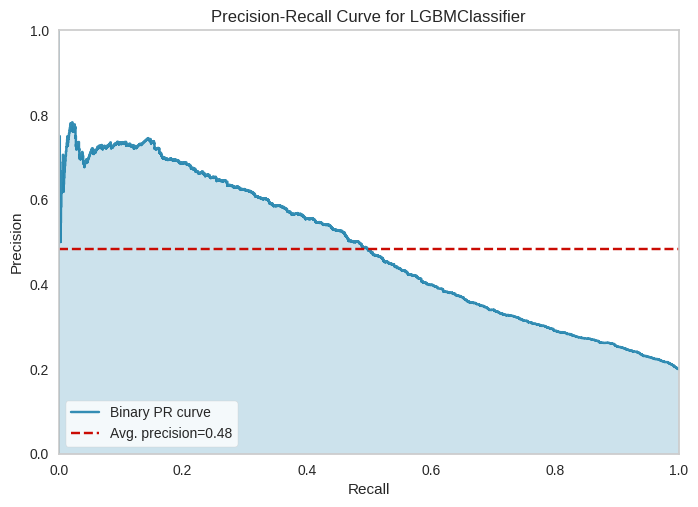

In [95]:
#plot precision-recall
plot_model(tuned_lightgbm,'pr')

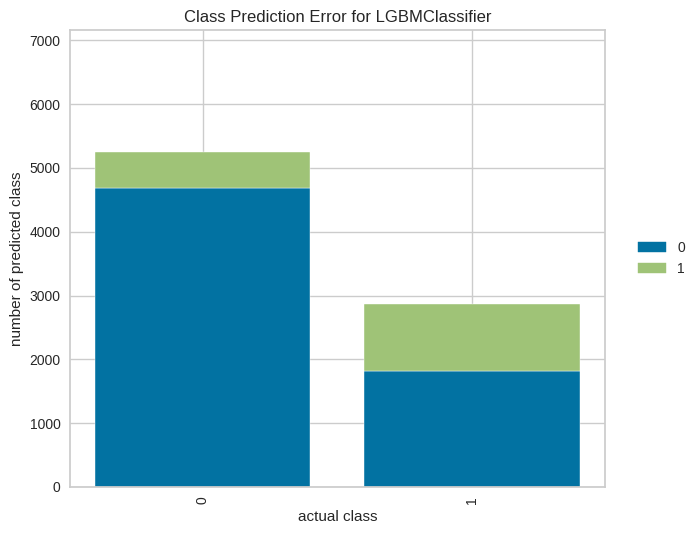

In [96]:
#plot - Class Prediction Error
plot_model(tuned_lightgbm,'error' )

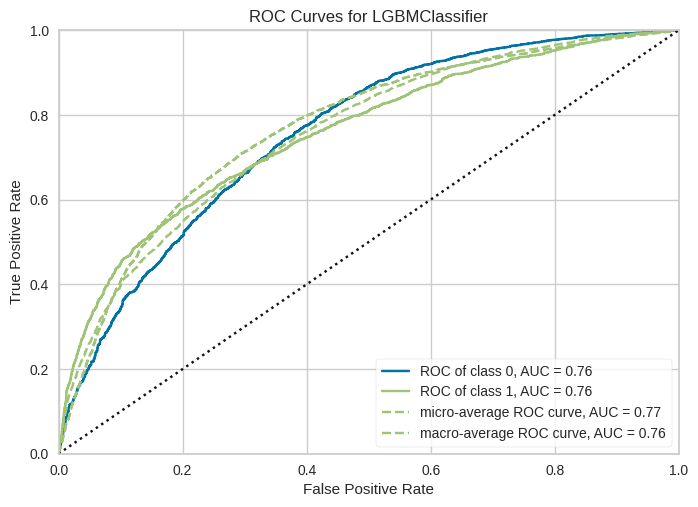

In [97]:
#plot - Class Prediction Error
plot_model(tuned_lightgbm,'auc' )

In [98]:
#predict on validation set
pred_holdout = predict_model(tuned_lightgbm)
pred_holdout

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,geometric mean,fbeta_score
0,Light Gradient Boosting Machine,0.7077,0.7558,0.6531,0.3681,0.4708,0.2900,0.3128,0.6872,0.6863,0.5655


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,default payment next month,Label,Score
0,1.056116,0.022261,1.891380,2.005934,1.743078,1.818050,1.791900,1.953137,0.962657,0.920530,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6984
1,1.514537,1.456348,2.221875,1.979683,1.916914,1.921448,0.467554,2.752828,1.773719,1.448330,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.6242
2,1.000525,-1.121401,1.965791,1.863868,1.851589,2.028902,1.874556,1.967259,0.981691,0.911613,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7491
3,-1.009667,-0.796529,-0.273688,-0.156511,-0.076011,-0.085134,0.111725,-0.006110,-0.409618,-0.380775,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8616
4,-0.055950,0.360859,0.065596,0.310295,0.489958,0.523169,0.878631,0.781240,0.765181,0.817796,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0.618748,1.246457,-0.970726,-1.110770,-1.116963,-0.983569,-1.068640,-0.873772,-1.191390,-1.171733,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.6260
8119,-1.469074,1.456348,-0.372710,-0.327987,-0.235940,-0.258077,-0.144109,-0.240914,-1.191390,-0.260775,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0.8352
8120,0.134328,-1.295492,1.696812,1.689654,1.722425,1.860453,0.935433,-0.638457,0.704476,0.159738,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.5365
8121,1.161334,0.139700,-1.038410,-1.090500,-1.066080,-0.942369,-1.011420,-0.842351,-1.017316,-0.732332,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7766


In [99]:
#finalize
final=finalize_model(tuned_lightgbm)
final

LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [100]:
#predict on test set(unseen)
prediction=predict_model(final,data=unseen)
prediction

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,balanced accuracy score,geometric mean,fbeta_score
0,Light Gradient Boosting Machine,0.7151,0.7610,0.6792,0.3894,0.4950,0.3163,0.3401,0.7018,0.7014,0.5912


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Label,Score
25836,170000,2,2,1,31,0,0,0,0,0,...,111881,5210,5323,5402,4071,4215,4081,0,0,0.8462
23220,150000,2,3,2,35,-1,2,-1,2,-1,...,2036,0,2264,0,163,2036,0,0,1,0.7253
10904,20000,2,3,1,47,0,0,0,0,2,...,15255,1401,1306,2000,0,800,800,0,1,0.5128
8633,140000,2,1,1,31,-2,-2,-2,-2,-2,...,418,422,0,2325,4063,419,969,0,0,0.7519
27080,290000,1,1,2,38,-2,-2,-2,-2,-2,...,-57060,1827,2066,2287,1242,1827,60860,0,1,0.5612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19828,380000,2,1,1,43,0,0,0,0,0,...,86661,6000,5000,5000,5000,5000,5000,0,0,0.9457
25450,50000,2,2,2,25,0,0,0,0,0,...,0,2000,1814,1000,0,0,0,0,0,0.6948
22917,360000,2,2,1,41,0,0,0,0,0,...,20981,2000,2000,2000,8000,10000,10000,0,0,0.7345
20549,50000,1,2,2,31,0,0,2,0,0,...,15925,2719,0,2000,1000,1542,764,0,0,0.5290


In [71]:
prediction[prediction['default payment next month'] ==0][0:12]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Label,Score
25836,170000,2,2,1,31,0,0,0,0,0,...,111881,5210,5323,5402,4071,4215,4081,0,0,0.8031
23220,150000,2,3,2,35,-1,2,-1,2,-1,...,2036,0,2264,0,163,2036,0,0,1,0.7291
10904,20000,2,3,1,47,0,0,0,0,2,...,15255,1401,1306,2000,0,800,800,0,0,0.5100
8633,140000,2,1,1,31,-2,-2,-2,-2,-2,...,418,422,0,2325,4063,419,969,0,0,0.7764
27080,290000,1,1,2,38,-2,-2,-2,-2,-2,...,-57060,1827,2066,2287,1242,1827,60860,0,0,0.7113
28617,100000,2,2,2,41,0,0,0,0,0,...,63235,3600,3289,2632,2449,2300,2539,0,0,0.7671
1013,80000,1,2,2,36,0,0,0,0,0,...,29757,2000,2000,1500,1500,2000,1500,0,0,0.6153
25397,340000,2,1,2,26,1,2,2,2,2,...,11728,2637,1353,531,14,235,1400,0,1,0.7140
22203,20000,2,2,1,24,0,0,0,0,0,...,17294,1600,1687,1140,1800,1000,0,0,0,0.5857
12100,120000,1,2,1,41,1,2,2,2,2,...,45643,2000,0,3400,3200,2000,2000,0,1,0.8456


In [102]:
prediction[prediction['default payment next month'] ==1][0:20]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Label,Score
17274,150000,2,1,2,33,0,0,0,0,0,...,0,1189,1167,1000,0,0,0,1,0,0.5916
3100,400000,2,3,1,41,0,0,0,0,0,...,20030,2620,1000,0,13945,7116,1280,1,0,0.6125
15875,100000,2,1,2,22,1,2,0,0,0,...,78711,0,3400,3400,3000,3500,3200,1,0,0.5336
3358,130000,2,2,1,28,0,0,0,0,0,...,67557,4000,4000,8000,6000,0,2500,1,0,0.6876
587,210000,1,3,2,25,-1,-1,2,-1,-1,...,1990,23776,0,9631,1561,1990,7967,1,0,0.6976
17304,290000,2,2,2,37,2,0,0,0,0,...,144318,13010,11430,6900,5320,5232,4980,1,1,0.8683
8248,140000,2,1,2,28,1,2,0,0,0,...,92044,0,5000,3300,3500,3500,3550,1,1,0.5359
9472,440000,2,2,2,25,2,2,0,0,0,...,243555,0,10000,10000,10000,10000,10000,1,1,0.8158
9954,70000,1,1,2,29,1,2,0,0,0,...,42021,5,2910,1000,20000,1600,2000,1,1,0.8054
15929,60000,2,2,1,32,2,2,2,2,2,...,23583,1700,1500,1000,1000,1000,0,1,1,0.9546


In [103]:
#confusion matrix
print(confusion_matrix(prediction["default payment next month"],prediction["Label"]))

[[820 312]
 [ 94 199]]


In [104]:
# imbalanced classification report
print(classification_report_imbalanced(prediction["default payment next month"],prediction["Label"]))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.72      0.68      0.80      0.70      0.49      1132
          1       0.39      0.68      0.72      0.50      0.70      0.49       293

avg / total       0.79      0.72      0.69      0.74      0.70      0.49      1425

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Cur

[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will b

In [ ]:
save_model(final,"german-oct15-2022-grid_rf")